# ANALYSIS FOR ECML-PKDD 2025

If you need to change kernel:
- ctrl + shift + p
- select interpreter Python --> /leonardo_work/try25_pellegrino/Water_Resources/env/bin/python3.10
- then select new kernel in the upper-right corner of the notebook

In [2]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from keras import activations
from tqdm import tqdm

from skimage.transform import resize
from sklearn.metrics import mean_squared_error

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

import os
import copy


2025-03-11 10:49:13.586957: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 10:49:14.925936: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 10:49:20.954323: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-11 10:49:20.958127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-11 10:49:21.804900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
# Ottieni il percorso effettivo da una variabile d'ambiente
work_path = "/leonardo_work/try25_pellegrino/"  # Ottieni il valore della variabile d'ambiente WORK
v_test_OHE_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_month_OHE.npy")
v_test_image_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_normalized_image_sequences.npy")
v_test_target_dates_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_target_dates.npy")

# Carica l'array numpy dai file
vottignasco_test_OHE    = np.load(v_test_OHE_path)
vottignasco_test_image  = np.load(v_test_image_path)
vottignasco_test_dates  = np.load(v_test_target_dates_path)


print(len(vottignasco_test_dates))
print(len(vottignasco_test_image))
print(len(vottignasco_test_OHE))

105
105
105


In [4]:
sample_result_path = "Water_Resources/rise-video/XAI/spatial_temporal/results/01_marco_st_lime_shap_20250308184201/lime_shap_st_results_setup_ns_7_comp_10.pkl"

In [5]:
# Loading results
result_st = None
path_to_load_results = os.path.join(work_path, sample_result_path)

with open(path_to_load_results, 'rb') as file:
  result_st = pickle.load(file)

print(result_st)

{'lime': {'ns_7_comp_10_kw_50_alpha_0.1': {'coefficients': [array([ 3.41945408e-03, -1.85111532e-03, -6.86530282e-03, -6.49710375e-04,
        6.14184904e-05, -2.39694158e-03,  6.85143012e-03,  1.22701912e-02,
        4.41033518e-03, -1.88664723e-03,  1.34855686e-02, -1.27989620e-04,
        1.10588114e-02,  2.77952044e-03, -4.31232136e-03,  2.26931486e-03,
        3.37921935e-03,  1.39094982e-02,  4.90911092e-04, -7.34375459e-03,
        3.37503840e-03,  2.71943274e-02,  4.48322385e-03,  5.87536537e-03,
        1.82891196e-02,  1.10856761e-02,  9.67663337e-03,  6.11016425e-03,
        2.76017624e-02,  1.18225920e-02,  2.79423337e-02,  8.28200288e-03,
        6.03969270e-03,  1.52669183e-02,  1.72595493e-02,  3.06587221e-02,
        6.77104151e-04, -1.93718112e-03,  2.92508816e-02, -4.05860114e-03,
        2.48763130e-02,  1.72334739e-02, -7.22868046e-03,  3.52966636e-03,
       -3.44600607e-04,  5.00514966e-03,  1.95368097e-04,  6.68552479e-03,
        6.44317172e-03,  4.93132707e-01,

In [6]:
lime_st_results = result_st["lime"]["ns_7_comp_10_kw_50_alpha_0.1"]
lime_st_results.keys()

dict_keys(['coefficients', 'saliency_videos', 'errors_insertion', 'auc_insertion', 'errors_deletion', 'auc_deletion', 'executions_times', 'parameters_comb'])

In [7]:
lime_st_results["saliency_videos"].shape

(105, 104, 5, 8)

In [121]:
nr_instance = 10
# saliency_video = result_st["lime"]["ns_4_comp_25_kw_50_alpha_0.1"]["saliency_videos"][nr_instance]
saliency_video = lime_st_results["saliency_videos"][nr_instance]

In [122]:
saliency_video.shape

(104, 5, 8)

In [123]:
print("Statistics: \n")
print(f"Mean: {saliency_video.mean()}")
print(f"Std: {saliency_video.std()}")
print(f"Min: {saliency_video.min()}")
print(f"Max: {saliency_video.max()}")


Statistics: 

Mean: 0.032840394450889966
Std: 0.0842509321088706
Min: -0.008448559896152867
Max: 0.36476848836818776


In [124]:
video_np = copy.deepcopy(saliency_video)

video_perc = np.percentile(video_np, 98, axis=(1,2))
print(video_perc)
print(video_perc.shape)

[0.00501823 0.00683224 0.00683224 0.00683224 0.00683224 0.00683224
 0.00683224 0.00683224 0.00683224 0.00683224 0.00683224 0.00683224
 0.00683224 0.00683224 0.00996076 0.00996076 0.00996076 0.00996076
 0.00996076 0.00996076 0.00996076 0.00996076 0.00996076 0.00996076
 0.00996076 0.00996076 0.00996076 0.0219654  0.0219654  0.0219654
 0.0219654  0.0219654  0.0219654  0.0219654  0.0219654  0.0219654
 0.0219654  0.0219654  0.0219654  0.0219654  0.02284487 0.02284487
 0.02284487 0.02284487 0.02284487 0.02284487 0.02284487 0.02284487
 0.02284487 0.02284487 0.02284487 0.02284487 0.02284487 0.03451584
 0.03451584 0.03451584 0.03451584 0.03451584 0.03451584 0.03451584
 0.03451584 0.03451584 0.03451584 0.03451584 0.03451584 0.03451584
 0.03451584 0.01238449 0.01238449 0.01238449 0.01238449 0.01238449
 0.01238449 0.01238449 0.01238449 0.01238449 0.01238449 0.01238449
 0.01238449 0.01238449 0.36476849 0.36476849 0.36476849 0.36476849
 0.36476849 0.36476849 0.36476849 0.36476849 0.36476849 0.364768

In [125]:
video_np[video_np < video_perc.reshape(104,1,1)] = np.nan

In [126]:
video_np.shape

(104, 5, 8)

In [127]:
# Create a meshgrid for the 3D coordinates
z, x, y = np.indices(video_np.shape)

# Flatten the arrays for plotting
x_flat = x.ravel()
y_flat = y.ravel()
z_flat = z.ravel()
data_flat = video_np.ravel()

In [128]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon, box, LineString, MultiLineString

<Axes: >

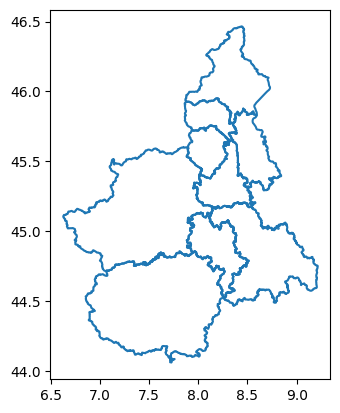

In [129]:
piedmont_shp = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/shapefile_raster/Ambiti_Amministrativi-Province.shp" 

piedmont_bounds = gpd.read_file(piedmont_shp)
piedmont_bounds = piedmont_bounds.to_crs('epsg:4326')
# remove the small enclaved Cuneo area inside Torino province
piedmont_bounds = piedmont_bounds[:-1]

# extract bound, useful for plots
piemonte_long_min, piemonte_lat_min, piemonte_long_max, piemonte_lat_max = piedmont_bounds.total_bounds

piedmont_bounds.boundary.plot()

In [130]:
# Catchment shapefile
catchment = gpd.read_file("/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/shapefile_raster/BAC_01_bacialti.shp") # select GRANA-MAIRA	and VARAITA
catchment = catchment.to_crs('epsg:4326')

# Select only the Grana-Maira catchment
catchment_GM = catchment.loc[catchment.NOME == "GRANA-MAIRA"]
catchment_GM = catchment_GM.reset_index(drop = True)
catchment_GM

,AREA_,PERIMETER,BACIALTI_,BACIALTI_I,BACIALTI_A,BACIALTI_P,ID_BACIA,CODICE,NOME,NUMERO,SHAPE_AREA,SHAPE_LEN,geometry
0,1.213496e+09,238270.49997,23,23,1.213514e+09,238272.234,18,Q,GRANA-MAIRA,23,1.213496e+09,238270.499637,"POLYGON ((7.73883 44.62121, 7.73742 44.6128, 7..."


In [131]:
# Retrieve the borders of the catchment from the shapefile
xmin_clip, ymin_clip, xmax_clip, ymax_clip = catchment_GM.total_bounds
# Extend the borders to include more pixel on the borders

increase = 0.05 # Degrees
#ymin_clip -= increase # not needed
xmin_clip += increase # "+" for subset for pixel included in the mask
xmax_clip += increase
#ymax_clip += increase # not needed

# Define a box around the Region of Interest (ROI)
ROI_box = box(xmin_clip, ymin_clip, xmax_clip , ymax_clip)

<Axes: >

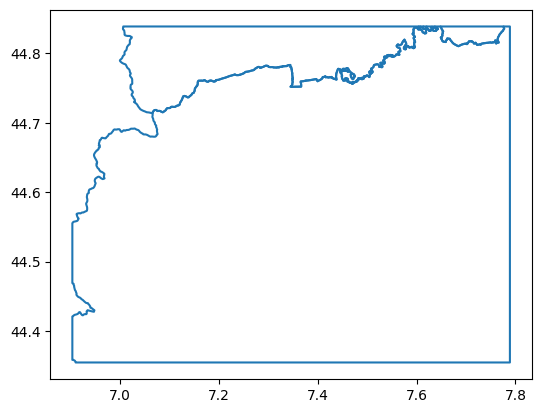

In [132]:
piedmont_bounds.clip(ROI_box).boundary.plot()

In [133]:
piedmont_bounds.clip(ROI_box).boundary

2    LINESTRING (6.9041 44.55565, 6.90487 44.55636,...
4    MULTILINESTRING ((7.7762 44.83811, 7.77644 44....
dtype: geometry

In [134]:
def normalize_min_max(x, min, max):
    return (x - min) / (max - min)

LINESTRING (6.904104380539796 44.55565112641085, 6.904872180143708 44.55635840994006, 6.905585905001284 44.556830651737506, 6.9065137275251365 44.55727978706695, 6.907801054950241 44.55754646581067, 6.909156072477752 44.55767031915033, 6.909968223250306 44.5578562347635, 6.911080831674682 44.558047661981384, 6.911920658204196 44.55815303767089, 6.91281861380446 44.55839454237871, 6.91360329202011 44.55863395078989, 6.914333424697253 44.55898038216033, 6.914861672442653 44.559701233390776, 6.915368639349857 44.56031367036159, 6.915634220559268 44.560633613673666, 6.916050286892776 44.56133441641375, 6.916256730239696 44.56155873242156, 6.916391192944616 44.56170523736298, 6.916463973596451 44.56178308065381, 6.91522885402937 44.563056913912426, 6.914041227896684 44.56422355859069, 6.913484371847727 44.565356716748575, 6.912974377115837 44.566598752658685, 6.912458998279725 44.56766062948665, 6.912495902358213 44.56849854255751, 6.913610575433954 44.56902307010648, 6.915398652516251 44.5

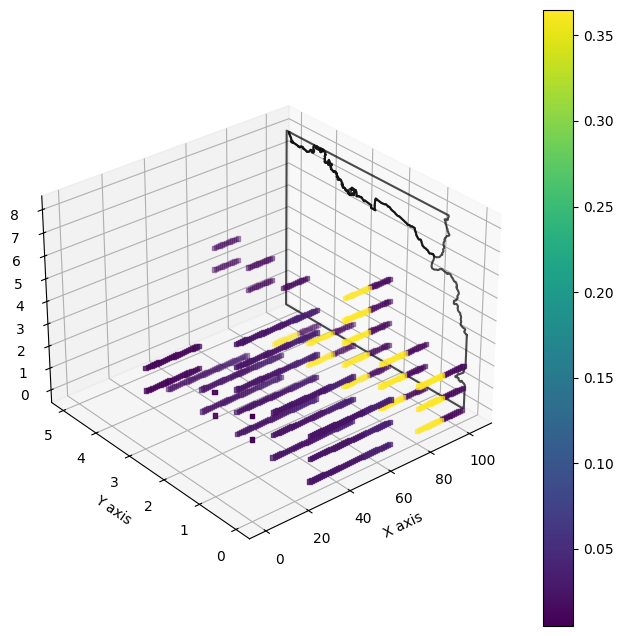

In [142]:
# Create a figure and axis for 3D plotting
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, with color based on the value of the point
sc = ax.scatter(z_flat, y_flat, x_flat, s=10, c=data_flat, marker="s", cmap='viridis')

######
# timeframes = video_np.shape[0]
# x_unique = np.unique(x_flat)  # Unique x values
# y_unique = np.unique(y_flat)  # Unique y values
# X, Y = np.meshgrid(x_unique, y_unique)  # Create 2D grid

# for i in range(timeframes):
#     start_idx = i*(len(y_unique)*len(x_unique))
#     end_idx = (i+1)*(len(y_unique)*len(x_unique))
#     Z = data_flat[start_idx:end_idx].reshape(len(y_unique), len(x_unique))  # Reshape Z
#     sc = ax.contour(Z, Y, X, 50, zdir='x', cmap='viridis')
######

# Add a color bar
plt.colorbar(sc)

# #####
y_offset = 104
geom = piedmont_bounds.clip(ROI_box).boundary
for el in geom:
    if isinstance(el, (LineString, MultiLineString)):
            print(el)
            for line in [el] if isinstance(el, LineString) else el.geoms:
                coords = np.array(line.coords)
                print(coords.shape)
                x_normalized = normalize_min_max(coords[:, 0], xmin_clip, xmax_clip)
                print(x_normalized)
                z_normalized = normalize_min_max(coords[:, 1], ymin_clip, ymax_clip)
                
                ax.plot(y_offset, x_normalized*5, z_normalized*8, color='black', alpha=0.7)
                # ax.plot(coords[:, 0], y_offset, coords[:, 1], color='green', alpha=0.7)
# #####

# Labels for axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

el = 30
az = -130
ax.view_init(el, az) 

# ax.plot_surface(x[0], y[0], z[0], rstride=1, cstride=1)

# Show plot
plt.show()

In [136]:
# IDEE DA IMPLEMENTARE
# 1. plot_trisurf or a plot creating a unique surface
# 2. add shapfile with plot_surface

In [137]:
cp_video_np = copy.deepcopy(saliency_video)

xs_max = []
ys_max = []
zs_max = []

for frame in range(len(cp_video_np)):
    idx_flat = cp_video_np[frame].argmax()
    idx = np.unravel_index(idx_flat, cp_video_np[frame].shape)
    xs_max.append(idx[0])
    ys_max.append(idx[1])
    zs_max.append(cp_video_np[frame][idx])


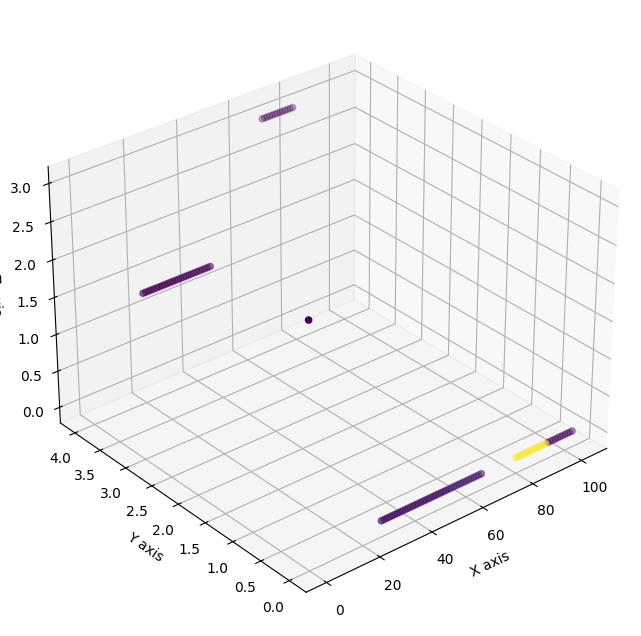

In [138]:
# Create a figure and axis for 3D plotting
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([i for i in range(104)], ys_max, xs_max, c=zs_max)

# Labels for axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

el = 30
az = -130
ax.view_init(el, az) 

# ax.plot_surface(x[0], y[0], z[0], rstride=1, cstride=1)

# Show plot
plt.show()

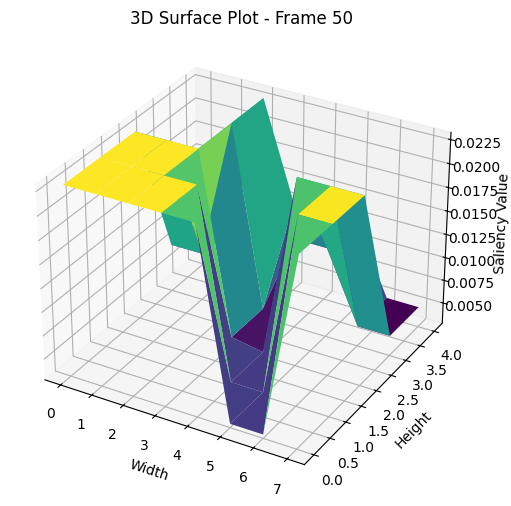

In [143]:
# Generate example saliency data
saliency_data = copy.deepcopy(saliency_video)  # Simulated data
frame_idx = 50  # Choose a specific frame

X, Y = np.meshgrid(np.arange(8), np.arange(5))
Z = saliency_data[frame_idx]  # Take the 5x8 frame

# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Saliency Value')
ax.set_title(f'3D Surface Plot - Frame {frame_idx}')
plt.show()

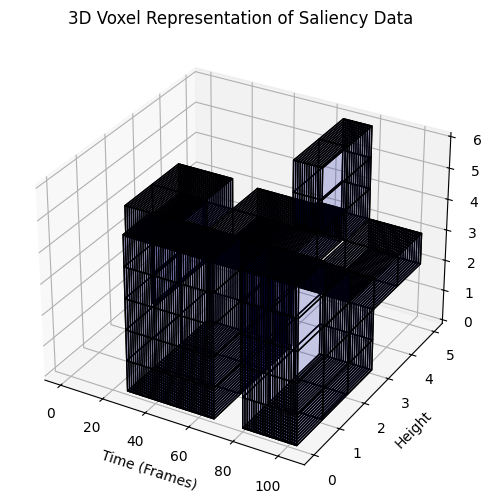

In [153]:
# Generate example saliency data
saliency_data = ~np.isnan(video_np) #> 0.8  # Binary threshold for visibility

# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.voxels(saliency_data, facecolors='blue', edgecolors='k', alpha=0.1)

ax.set_xlabel('Time (Frames)')
ax.set_ylabel('Height')
ax.set_zlabel('Width')
ax.set_title('3D Voxel Representation of Saliency Data')
plt.show()